<a href="https://colab.research.google.com/github/Pitap4ik/Stock-market-prerdictions/blob/main/market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [259]:
import yfinance as yf
import pandas as pd
import os

In [260]:
from google.colab import files
uploaded = files.upload()

Saving ETHUSDT_daily_binance.xlsx to ETHUSDT_daily_binance (2).xlsx


In [261]:
# if os.path.exists("D:\Ass2\ETHUSDT_1h_latest.csv"):
#     sp500 = pd.read_csv("D:\Ass2\ETHUSDT_1h_latest.csv", index_col=0)
# else:
#     sp500 = yf.Ticker("^GSPC")
#     sp500 = sp500.history(period="max")
#     sp500.to_csv("sp500.csv")

In [262]:
sp500 = pd.read_excel("ETHUSDT_daily_binance (1).xlsx")

In [263]:
#sp500.index = pd.to_datetime(sp500.index)
sp500.columns = [col.capitalize() for col in sp500.columns]
sp500['Close']=[float(x) for x in sp500['Close']]
# sp500['Volume']=[float(x) for x in sp500['Volume']]
sp500['Open']=[float(x) for x in sp500['Open']]
sp500['High']=[float(x) for x in sp500['High']]
sp500['Low']=[float(x) for x in sp500['Low']]
#sp500 = sp500.drop('Volume', axis=1)

In [264]:
sp500

,Timestamp,Open,High,Low,Close,Volume
0,2021-03-20 00:00:00,1809.01,1868.83,1800.86,1806.10,451556.10639
1,2021-03-21 00:00:00,1806.57,1817.16,1747.00,1782.98,465953.98749
2,2021-03-22 00:00:00,1783.23,1807.51,1655.15,1680.97,582727.49081
3,2021-03-23 00:00:00,1681.17,1721.17,1650.00,1668.08,577213.99589
4,2021-03-24 00:00:00,1668.20,1740.86,1536.92,1581.84,753834.52393
...,...,...,...,...,...,...
1495,2025-04-23 00:00:00,1756.25,1834.86,1744.95,1795.07,887545.63160
1496,2025-04-24 00:00:00,1795.08,1802.82,1722.90,1769.65,483465.03850
1497,2025-04-25 00:00:00,1769.64,1827.32,1738.60,1784.60,595610.88940
1498,2025-04-26 00:00:00,1784.60,1841.16,1778.94,1820.88,355068.04420


<Axes: >

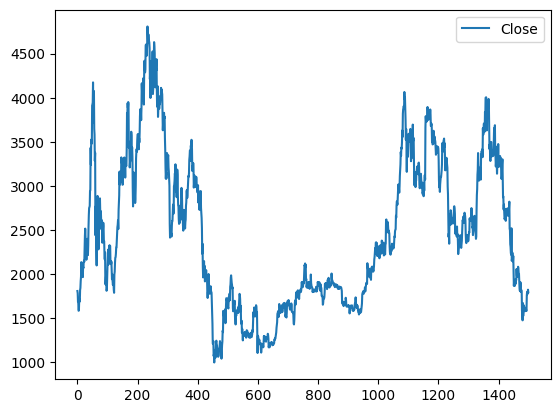

In [265]:
sp500.plot.line(y="Close", use_index=True)

In [266]:
# del sp500["Dividends"]
# del sp500["Stock Splits"]

In [267]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)-sp500["Open"].shift(-1)

In [268]:
sp500["Tomorrow_low"] = sp500["Low"].shift(-1)-sp500["Open"].shift(-1)

In [269]:
sp500["Target"] = (sp500["Tomorrow"] >0).astype(int)

In [270]:
sp500["Percent"] = sp500["Tomorrow"]/sp500["Close"]

In [271]:
sp500["Percent_low"] = sp500["Tomorrow_low"]/sp500["Close"]

In [272]:
def calculate_rsi(df, period=14):
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_stochrsi(df, period=14, smooth_period=3):
    rsi = calculate_rsi(df, period)
    rsi_min = rsi.rolling(window=period).min()
    rsi_max = rsi.rolling(window=period).max()
    stochrsi = (rsi - rsi_min) / (rsi_max - rsi_min)
    stochrsi_smooth = stochrsi.rolling(window=smooth_period).mean()  # Optional smoothing
    return stochrsi_smooth

In [273]:
sp500["Stoch_RSI"] = calculate_stochrsi(sp500)

In [274]:
sp500

,Timestamp,Open,High,Low,Close,Volume,Tomorrow,Tomorrow_low,Target,Percent,Percent_low,Stoch_RSI
0,2021-03-20 00:00:00,1809.01,1868.83,1800.86,1806.10,451556.10639,-23.59,-59.57,0,-0.013061,-0.032983,NaN
1,2021-03-21 00:00:00,1806.57,1817.16,1747.00,1782.98,465953.98749,-102.26,-128.08,0,-0.057353,-0.071835,NaN
2,2021-03-22 00:00:00,1783.23,1807.51,1655.15,1680.97,582727.49081,-13.09,-31.17,0,-0.007787,-0.018543,NaN
3,2021-03-23 00:00:00,1681.17,1721.17,1650.00,1668.08,577213.99589,-86.36,-131.28,0,-0.051772,-0.078701,NaN
4,2021-03-24 00:00:00,1668.20,1740.86,1536.92,1581.84,753834.52393,3.86,-32.48,1,0.002440,-0.020533,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2025-04-23 00:00:00,1756.25,1834.86,1744.95,1795.07,887545.63160,-25.43,-72.18,0,-0.014167,-0.040210,0.933610
1496,2025-04-24 00:00:00,1795.08,1802.82,1722.90,1769.65,483465.03850,14.96,-31.04,1,0.008454,-0.017540,0.933610
1497,2025-04-25 00:00:00,1769.64,1827.32,1738.60,1784.60,595610.88940,36.28,-5.66,1,0.020329,-0.003172,0.919688
1498,2025-04-26 00:00:00,1784.60,1841.16,1778.94,1820.88,355068.04420,-28.29,-38.97,0,-0.015536,-0.021402,0.950048


In [275]:
# sp500.index = pd.to_datetime(sp500.index, utc=True)
# sp500 = sp500.loc["1990-01-01":].copy()

In [276]:
sp500

,Timestamp,Open,High,Low,Close,Volume,Tomorrow,Tomorrow_low,Target,Percent,Percent_low,Stoch_RSI
0,2021-03-20 00:00:00,1809.01,1868.83,1800.86,1806.10,451556.10639,-23.59,-59.57,0,-0.013061,-0.032983,NaN
1,2021-03-21 00:00:00,1806.57,1817.16,1747.00,1782.98,465953.98749,-102.26,-128.08,0,-0.057353,-0.071835,NaN
2,2021-03-22 00:00:00,1783.23,1807.51,1655.15,1680.97,582727.49081,-13.09,-31.17,0,-0.007787,-0.018543,NaN
3,2021-03-23 00:00:00,1681.17,1721.17,1650.00,1668.08,577213.99589,-86.36,-131.28,0,-0.051772,-0.078701,NaN
4,2021-03-24 00:00:00,1668.20,1740.86,1536.92,1581.84,753834.52393,3.86,-32.48,1,0.002440,-0.020533,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2025-04-23 00:00:00,1756.25,1834.86,1744.95,1795.07,887545.63160,-25.43,-72.18,0,-0.014167,-0.040210,0.933610
1496,2025-04-24 00:00:00,1795.08,1802.82,1722.90,1769.65,483465.03850,14.96,-31.04,1,0.008454,-0.017540,0.933610
1497,2025-04-25 00:00:00,1769.64,1827.32,1738.60,1784.60,595610.88940,36.28,-5.66,1,0.020329,-0.003172,0.919688
1498,2025-04-26 00:00:00,1784.60,1841.16,1778.94,1820.88,355068.04420,-28.29,-38.97,0,-0.015536,-0.021402,0.950048


In [277]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Open", "High", "Low","Stoch_RSI"]# "Volume",
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [278]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.390625

<Axes: >

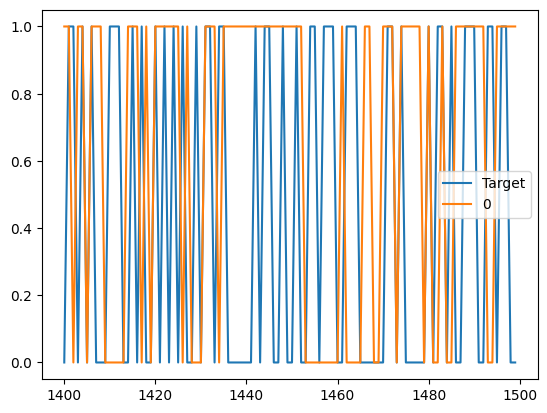

In [279]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [280]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [281]:
def backtest(data, model, predictors, start=500, step=50):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [282]:
predictions = backtest(sp500, model, predictors)

In [283]:
predictions["Predictions"].value_counts()

,count
Predictions,
0,525
1,475


In [284]:
precision_score(predictions["Target"], predictions["Predictions"])

0.52

In [285]:
predictions["Target"].value_counts() / predictions.shape[0]

,count
Target,
0,0.5
1,0.5


In [286]:
horizons = [2,5,10,20,50,100,200]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500[['Close']].rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    # trend_column = f"Trend_{horizon}"
    # sp500[trend_column] = sp500['Target'].shift(1).rolling(horizon).sum()

    new_predictors+= [ratio_column] #trend_column]

In [287]:
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])

In [288]:
sp500

,Timestamp,Open,High,Low,Close,Volume,Tomorrow,Tomorrow_low,Target,Percent,Percent_low,Stoch_RSI,Close_Ratio_2,Close_Ratio_5,Close_Ratio_10,Close_Ratio_20,Close_Ratio_50,Close_Ratio_100,Close_Ratio_200
199,2021-10-05 00:00:00,3386.31,3545.00,3363.78,3515.27,3.939009e+05,59.41,-173.48,1,0.016901,-0.049350,1.000000,1.018686,1.032871,1.110392,1.112202,1.063512,1.230540,1.311584
200,2021-10-06 00:00:00,3515.48,3632.11,3342.00,3574.89,6.182655e+05,12.59,-104.08,1,0.003522,-0.029114,0.960687,1.008409,1.034284,1.111131,1.130941,1.077877,1.244915,1.329442
201,2021-10-07 00:00:00,3574.88,3653.98,3470.80,3587.47,4.861024e+05,-24.34,-55.47,0,-0.006785,-0.015462,0.909412,1.001756,1.026066,1.092565,1.131562,1.077945,1.243140,1.329659
202,2021-10-08 00:00:00,3587.47,3695.00,3532.00,3563.13,4.035971e+05,11.69,-25.06,1,0.003281,-0.007033,0.909412,0.996596,1.010698,1.060660,1.121630,1.068199,1.229221,1.316048
203,2021-10-09 00:00:00,3563.13,3635.00,3538.07,3574.82,3.619068e+05,-160.61,-169.83,0,-0.044928,-0.047507,0.948725,1.001638,1.003285,1.041678,1.120966,1.069843,1.227038,1.315732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,2025-04-22 00:00:00,1579.57,1778.00,1537.26,1756.26,1.103037e+06,38.82,-11.30,1,0.022104,-0.006434,1.000000,1.052967,1.080767,1.091107,1.079240,0.955629,0.745473,0.636770
1495,2025-04-23 00:00:00,1756.25,1834.86,1744.95,1795.07,8.875456e+05,-25.43,-72.18,0,-0.014167,-0.040210,0.933610,1.010928,1.077275,1.101713,1.103841,0.980764,0.766314,0.651573
1496,2025-04-24 00:00:00,1795.08,1802.82,1722.90,1769.65,4.834650e+05,14.96,-31.04,1,0.008454,-0.017540,0.933610,0.992869,1.042453,1.076474,1.089791,0.971888,0.760187,0.643128
1497,2025-04-25 00:00:00,1769.64,1827.32,1738.60,1784.60,5.956109e+05,36.28,-5.66,1,0.020329,-0.003172,0.919688,1.004206,1.027386,1.072789,1.099723,0.984615,0.772138,0.649314


In [305]:
model = RandomForestClassifier(n_estimators=300, min_samples_split=50, random_state=2)

In [306]:
# def predict(train, test, predictors, model):
#     model.fit(train[predictors], train["Target"])
#     preds = model.predict_proba(test[predictors])[:,1]
#     real_preds = pd.Series(preds, index=test.index, name="Real_predictions")
#     preds[preds >=.54] = 1
#     preds[preds <.54] = 0
#     preds = pd.Series(preds, index=test.index, name="Predictions")
#     combined = pd.concat([test['Timestamp'], test["Target"], preds, real_preds, test["Percent"]], axis=1)
#     return combined

In [307]:
def predict(train, test, predictors, model):
    # Fit the model on the training data
    model.fit(train[predictors], train["Target"])

    # Generate raw probability predictions
    preds = model.predict_proba(test[predictors])[:,1]

    # Create the "Real_predictions" Series from the raw probabilities
    real_preds = pd.Series(preds, index=test.index, name="Real_predictions")

    # Create a copy of the raw predictions to avoid modifying the original array
    preds_copy = preds.copy()

    # Apply thresholding to convert probabilities into binary predictions
    preds_copy[preds_copy >= .54] = 1
    preds_copy[preds_copy < .54] = 0

    # Create the "Predictions" Series from the thresholded predictions
    preds = pd.Series(preds_copy, index=test.index, name="Predictions")

    # Combine the results into a single DataFrame
    combined = pd.concat([test['Timestamp'], test["Target"], preds, real_preds, test["Percent"], test["Percent_low"], test["Stoch_RSI"]], axis=1)

    return combined

In [308]:
predictions = backtest(sp500, model, new_predictors)

In [309]:
predictions["Predictions"].value_counts()

,count
Predictions,
0.0,552
1.0,248


In [310]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5564516129032258

In [311]:
predictions["Target"].value_counts() / predictions.shape[0]

,count
Target,
1,0.50125
0,0.49875


In [312]:
predictions=predictions[predictions['Predictions']==1]

In [313]:
predictions["Timestamp"]=pd.to_datetime(predictions["Timestamp"])
predictions["Duration"]=predictions["Timestamp"].diff()

In [314]:
predictions_copy=predictions.copy()

In [315]:
predictions

,Timestamp,Target,Predictions,Real_predictions,Percent,Percent_low,Stoch_RSI,Duration
706,2023-02-24,0,1.0,0.610115,-0.008222,-0.031391,0.847267,NaT
707,2023-02-25,1,1.0,0.587048,0.029337,-0.004277,0.909265,1 days
710,2023-02-28,1,1.0,0.612167,0.037365,-0.006379,0.815533,3 days
713,2023-03-03,0,1.0,0.594722,-0.001733,-0.012954,0.058129,3 days
714,2023-03-04,0,1.0,0.545322,-0.001379,-0.008738,0.058129,1 days
...,...,...,...,...,...,...,...,...
1480,2025-04-08,1,1.0,0.603288,0.133093,-0.059970,0.000000,1 days
1482,2025-04-10,1,1.0,0.600281,0.029305,-0.011568,0.262042,2 days
1483,2025-04-11,1,1.0,0.543908,0.049354,-0.013269,0.458891,1 days
1485,2025-04-13,1,1.0,0.583736,0.016279,-0.001377,0.719568,2 days


In [316]:
for i in range(len(predictions)):
  if predictions.iloc[i,5]*100<1:
    print(predictions.iloc[i,0],predictions.iloc[i,3], predictions.iloc[i,4]*100,predictions.iloc[i,5]*100,predictions.iloc[i,6])

2023-02-24 00:00:00 0.6101152775856199 -0.8222415723348692 -3.139072023883569 0.8472669233355031
2023-02-25 00:00:00 0.5870484120816928 2.9336878676516682 -0.4276988297858958 0.9092648617430578
2023-02-28 00:00:00 0.6121674785761505 3.7365361973050604 -0.637914815945379 0.815533421797681
2023-03-03 00:00:00 0.5947215047226492 -0.1733091210296618 -1.2953582465194913 0.05812862084698429
2023-03-04 00:00:00 0.5453219520584967 -0.13786676708814422 -0.8737944636280696 0.05812862084698429
2023-03-05 00:00:00 0.543795740310244 0.08117194390826815 -0.6474581037722509 0.009842178270617457
2023-03-08 00:00:00 0.602532824346235 -6.2034221276706925 -8.116785653689039 0.06474901151922106
2023-03-09 00:00:00 0.5510239731742275 -0.7569643503186404 -4.795730943700765 0.06474901151922106
2023-03-11 00:00:00 0.5684308047569493 7.364280522021499 -1.6053316304000838 0.10973410850473479
2023-03-15 00:00:00 0.5624784264153183 1.4412470605347993 -1.0769958059589313 0.8820488552016085
2023-03-17 00:00:00 0.54

In [317]:
indexes_to_drop = []

# Loop through all rows except the last one
for i in range(len(predictions_copy) - 1):
    if (predictions.iloc[i+1, 0] - predictions.iloc[i, 0] == pd.Timedelta(days=1)):
        predictions.iloc[i+1, 4] = ((1 + predictions.iloc[i+1, 4]) * (1 + predictions.iloc[i, 4]))-1
        indexes_to_drop.append(predictions.index[i])  # Mark this row to drop

# After the loop, drop all marked rows
predictions.drop(index=indexes_to_drop, inplace=True)

In [318]:
predictions

,Timestamp,Target,Predictions,Real_predictions,Percent,Percent_low,Stoch_RSI,Duration
707,2023-02-25,1,1.0,0.587048,0.020873,-0.004277,0.909265,1 days
710,2023-02-28,1,1.0,0.612167,0.037365,-0.006379,0.815533,3 days
715,2023-03-05,1,1.0,0.543796,-0.002300,-0.006475,0.009842,1 days
719,2023-03-09,0,1.0,0.551024,-0.069134,-0.047957,0.064749,1 days
721,2023-03-11,1,1.0,0.568431,0.073643,-0.016053,0.109734,2 days
...,...,...,...,...,...,...,...,...
1475,2025-04-03,0,1.0,0.594847,0.012065,-0.032197,0.175404,1 days
1480,2025-04-08,1,1.0,0.603288,-0.075593,-0.059970,0.000000,1 days
1483,2025-04-11,1,1.0,0.543908,0.080105,-0.013269,0.458891,1 days
1485,2025-04-13,1,1.0,0.583736,0.016279,-0.001377,0.719568,2 days


In [319]:
#predictions.plot()

In [321]:
S = 100
for i in range(len(predictions)):
  print(predictions.iloc[i][4]*100, predictions.iloc[i][0])
  S=S*(1+(predictions.iloc[i][4]+0.0005)*4-0.001*4)
print(S)

2.087324294066417 2023-02-25 00:00:00
3.7365361973050604 2023-02-28 00:00:00
-0.2300174020959389 2023-03-05 00:00:00
-6.913428783983089 2023-03-09 00:00:00
7.364280522021499 2023-03-11 00:00:00
1.4412470605347993 2023-03-15 00:00:00
-0.4795182296271516 2023-03-18 00:00:00
3.9508766259998405 2023-03-20 00:00:00
4.581019759791968 2023-03-22 00:00:00
-0.43953657184335737 2023-03-24 00:00:00
3.368664078077446 2023-03-27 00:00:00
0.8916082941861567 2023-04-02 00:00:00
-0.4641077541777738 2023-04-06 00:00:00
3.3204963165694767 2023-04-09 00:00:00
-3.498409863898133 2023-04-24 00:00:00
1.1493649010319018e-05 2023-05-01 00:00:00
-2.572337093227439 2023-05-07 00:00:00
0.31724160920944106 2023-05-24 00:00:00
-0.6324621189882813 2023-05-31 00:00:00
-4.3992526309253766 2023-06-09 00:00:00
-5.124359239592663 2023-06-13 00:00:00
3.0570619570955535 2023-06-15 00:00:00
0.9396282808561196 2023-06-26 00:00:00
5.785470526195002 2023-06-29 00:00:00
2.5015193028434357 2023-07-12 00:00:00
-0.330782369970526

<ipython-input-321-b4cdb60f2319>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(predictions.iloc[i][4]*100, predictions.iloc[i][0])
<ipython-input-321-b4cdb60f2319>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  S=S*(1+(predictions.iloc[i][4]+0.0005)*4-0.001*4)
